In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
dataset = pd.read_csv('/content/cancer patient data sets.csv')

In [ ]:
dataset = dataset.drop(columns=['index', 'Patient Id'])

In [ ]:
le = LabelEncoder()
dataset['Level'] = le.fit_transform(dataset['Level'])

In [ ]:
if dataset.isnull().sum().any():
    data = dataset.dropna()

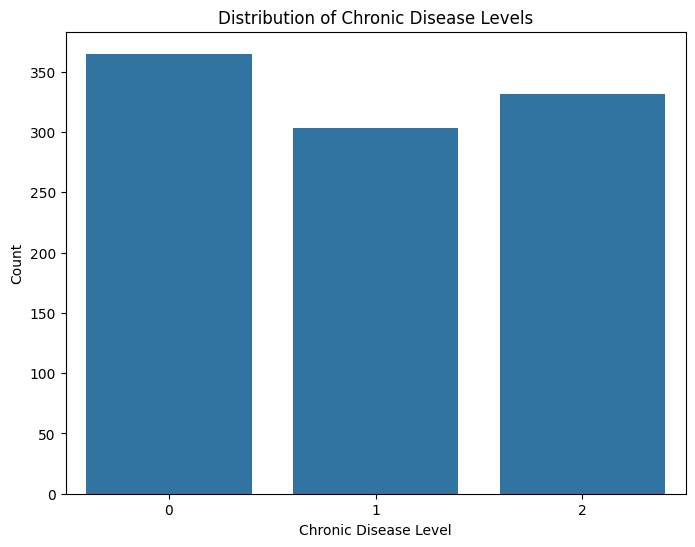

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', data=dataset)
plt.xlabel('Chronic Disease Level')
plt.ylabel('Count')
plt.title('Distribution of Chronic Disease Levels')
plt.show()

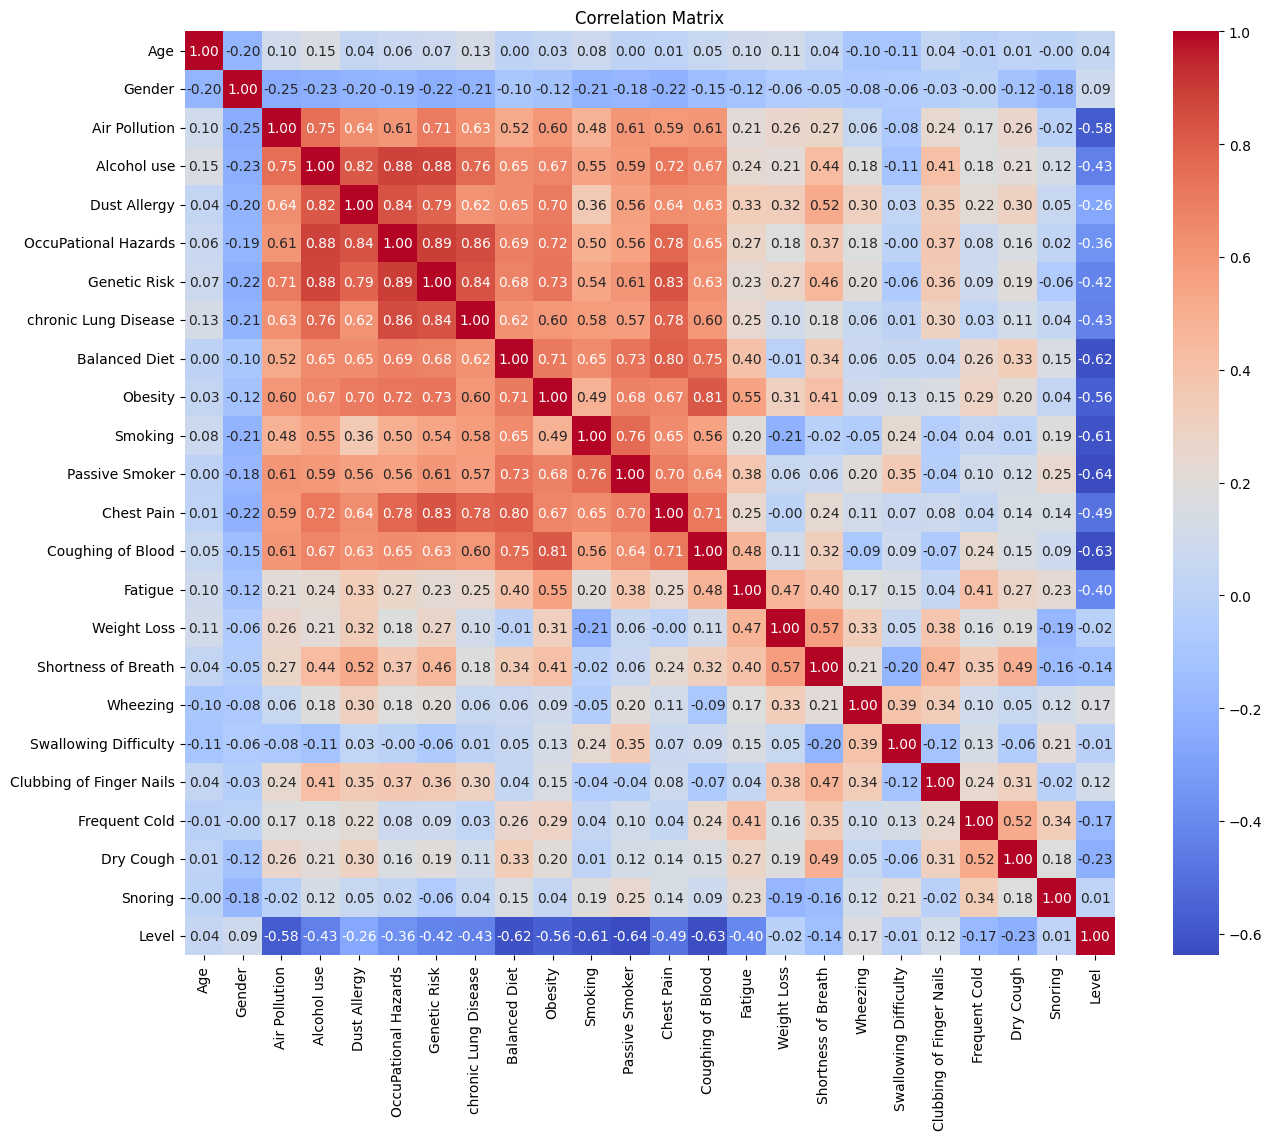

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = dataset.drop(columns=['Level'])
y = dataset['Level']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Model Accuracy: 1.00
Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)


In [ ]:
print("Top features influencing the prediction:")
print(feature_importances.head(10))

Top features influencing the prediction:
                          Importance
Coughing of Blood           0.112728
Passive Smoker              0.099777
Obesity                     0.085630
Wheezing                    0.075292
Fatigue                     0.065887
Chest Pain                  0.047938
Balanced Diet               0.043398
Clubbing of Finger Nails    0.043121
Shortness of Breath         0.043086
Alcohol use                 0.040272


In [ ]:
def generate_recommendations(patient_data):
    recommendations = []
    # Example conditions based on feature importances
    if patient_data['Smoking'] > 5:
        recommendations.append("Reduce smoking to lower cancer risk.")
    if patient_data['Alcohol use'] > 5:
        recommendations.append("Consider reducing alcohol intake.")
    if patient_data['Balanced Diet'] < 3:
        recommendations.append("A balanced diet can improve overall health.")
    if patient_data['Obesity'] > 4:
        recommendations.append("Focus on weight management for better health.")
    return recommendations

In [ ]:
sample_patient = X.iloc[0]
sample_recommendations = generate_recommendations(sample_patient)
print("Personalized Recommendations for Sample Patient:")
print(sample_recommendations)

Personalized Recommendations for Sample Patient:
['A balanced diet can improve overall health.']
